In [1]:
from PIL import Image
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

In [23]:
p_real = Path("/home/shchen/DA_dahazing/datasets/dehazing/unlabeled")
p_gt = Path("/home/shchen/DA_dahazing/datasets/dehazing/train_b")
p_syn = Path("/home/shchen/DA_dahazing/datasets/dehazing/train_a")
p_gen = Path("/home/shchen/Pytorch-UNet/data/imgs")

In [58]:
len(os.listdir(p_gen))

8001

In [71]:
def get_res(p, accepted = ["0"], gen=False):
    first=True
    count=0
    for index, file in enumerate(os.listdir(p)):
        if not file.endswith('.png') and not file.endswith('.jpg'):
            continue
        if count>1000:
            break
        if gen and file.split(".")[0].split("_")[-1] not in accepted:
            continue
        file_path = Path(p,file)
        img = Image.open(file_path).convert('YCbCr')
        img = np.array(img.resize((256,256)))
        y_channel = img[:,:,0].flatten()
        if first:
            res = y_channel
            first = False
        else:
            res = np.hstack((res, y_channel))
        count+=1
    return res

In [72]:
res_real = get_res(p_real)
res_gt = get_res(p_gt)
res_syn = get_res(p_syn)
res_gen = get_res(p_gen, True)

In [73]:
len(res_real),len(res_gt),len(res_syn),len(res_gen)

(65536000, 65536000, 65536000, 65601536)

(0.0, 255.0)

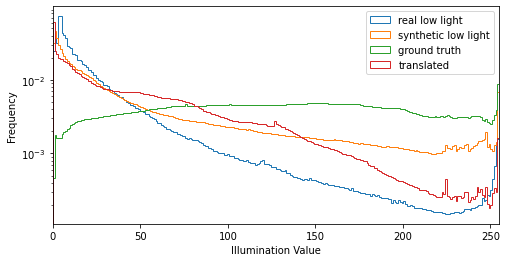

In [74]:
plt.hist(res_real, bins=256, log=True, histtype="step", density=True, label='real low light')
plt.hist(res_syn, bins=256, log=True, histtype="step", density=True, label='synthetic low light')
plt.hist(res_gt, bins=256, log=True, histtype="step", density=True, label='ground truth')
plt.hist(res_gen, bins=256, log=True, histtype="step", density=True, label='translated')
plt.legend()
plt.gcf().set_size_inches(8, 4)
plt.ylabel('Frequency')
plt.xlabel('Illumination Value')
plt.xlim([0, 255])

(0.0, 255.0)

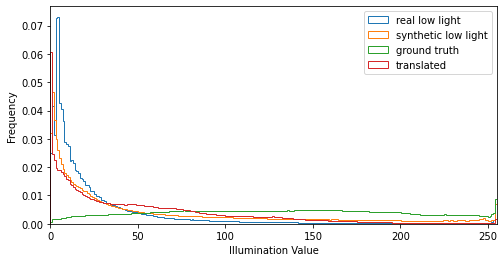

In [75]:
plt.hist(res_real, bins=256, log=False, histtype="step", density=True, label='real low light')
plt.hist(res_syn, bins=256, log=False, histtype="step", density=True, label='synthetic low light')
plt.hist(res_gt, bins=256, log=False, histtype="step", density=True, label='ground truth')
plt.hist(res_gen, bins=256, log=False, histtype="step", density=True, label='translated')
plt.legend()
plt.gcf().set_size_inches(8, 4)
plt.ylabel('Frequency')
plt.xlabel('Illumination Value')
plt.xlim([0, 255])

Text(0.5, 0, 'Illumination Value')

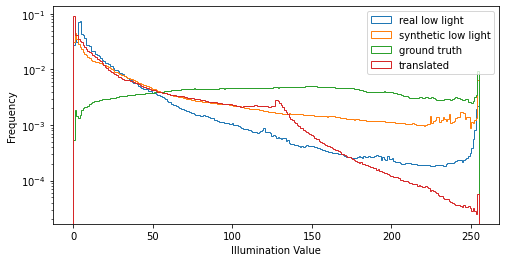

In [209]:
plt.hist(res_low_light, bins=256, log=True, histtype="step", density=True, label='real low light')
plt.hist(res_syn_low_light, bins=256, log=True, histtype="step", density=True, label='synthetic low light')
plt.hist(res_target, bins=256, log=True, histtype="step", density=True, label='ground truth')
plt.hist(res_10, bins=256, log=True, histtype="step", density=True, label='translated')
plt.legend()
plt.gcf().set_size_inches(8, 4)
plt.ylabel('Frequency')
plt.xlabel('Illumination Value')


In [76]:
res_6 = get_res(p_gen, ["06p"], True)
res_2 = get_res(p_gen, ["02"], True)
res_10 = get_res(p_gen, ["10"], True)

In [77]:
len(res_2),len(res_6),len(res_10)

(65536000, 65536000, 65536000)

(0.0, 255.0)

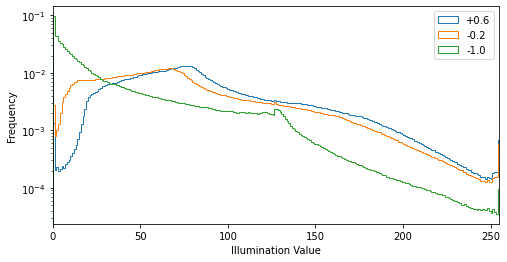

In [78]:
plt.hist(res_6, bins=256, log=True, histtype="step", density=True, label='+0.6')
plt.hist(res_2, bins=256, log=True, histtype="step", density=True, label='-0.2')
plt.hist(res_10, bins=256, log=True, histtype="step", density=True, label='-1.0')
plt.legend()
plt.gcf().set_size_inches(8, 4)
plt.ylabel('Frequency')
plt.xlabel('Illumination Value')
plt.xlim([0, 255])